## Working directory 

In [43]:
# change current working directory
import os
os.getcwd()

'/Users/kenlam/Desktop/Data science'

## Download datasets

In [44]:
import pandas as pd
# Note you will likely have to change these paths. 
# If your data is in the same folder as this project, 
# the paths will likely be fixed for you by deleting ../../Data/awards_project/ from each string.
awards = pd.read_csv("/Users/kenlam/Desktop/Data science/Oklahoma_project/awards_data.csv")
player_stats = pd.read_csv("/Users/kenlam/Desktop/Data science/Oklahoma_project/player_stats.csv")
team_data = pd.read_csv("/Users/kenlam/Desktop/Data science/Oklahoma_project/team_stats.csv")
rebounding_data = pd.read_csv("/Users/kenlam/Desktop/Data science/Oklahoma_project/team_rebounding_data_22.csv")

### Question 1  

**QUESTION:** What is the average number of points per game for players in the 2007-2021 seasons who won All NBA First, Second, and Third teams (**not** the All Defensive Teams), as well as for players who were in the All-Star Game (**not** the rookie all-star game)?


 

In [45]:
# Outline: 
# 1. groupby into 4 groups --> 1st, 2nd, 3rd team, all-star

# merge awards_data and player_stats into one df by inner join on nbapersonid and season
merged_df = pd.merge(awards, player_stats, on = ['nbapersonid', 'season'], how = 'inner')
merged_df.head()

# filter merged_df into containing players that won ALL NBA First team and not ALL Defensive Teams
nba_first_team = merged_df[(merged_df['All NBA First Team'] == 1) & (merged_df['All NBA Defensive First Team'] == 0) & (merged_df['All NBA Defensive Second Team'] == 0)]
# filter merged_df to contain NBA Second team and not ALL Defensive Teams
nba_sec_team = merged_df[(merged_df['All NBA Second Team'] == 1) & (merged_df['All NBA Defensive First Team'] == 0) & (merged_df['All NBA Defensive Second Team'] == 0)]
# filter merged_df to contain NBA Third team and not ALL Defensive Teams
nba_third_team = merged_df[(merged_df['All NBA Third Team'] == 1) & (merged_df['All NBA Defensive First Team'] == 0) & (merged_df['All NBA Defensive Second Team'] == 0)]
# filter merged_df to contain All-star Game and not rookie all-star game
nba_all_star_team = merged_df[(merged_df['all_star_game'] == True) & (merged_df['rookie_all_star_game']) == False]
# drop NA in nba_all_star_team and rookie_all_star_game
nba_all_star_team = nba_all_star_team.dropna(subset= ['all_star_game', 'rookie_all_star_game'])

# count NA values in nba_first_team, second_team, and third_team
nba_first_team['games'].isna().sum()
nba_first_team['points'].isna().sum()
nba_sec_team['games'].isna().sum()
nba_sec_team['points'].isna().sum()
nba_third_team['games'].isna().sum()
nba_third_team['points'].isna().sum()

# 2. calculate average number of points per game for players within each group 
# nbafirst_team 
nba_first_team_pts = nba_first_team['points'].sum() # calculate sum of points all players in first_team scored in all games from season 2007-2021
nba_first_team_games = nba_first_team['games'].sum() # calculate sum of # games players in first_team played in season 2007-2021
nba_first_team_ppg = round((nba_first_team_pts / nba_first_team_games), 1) # take average points per game for all players in season 2007-2021

# nba_sec_team
nba_sec_team_pts = nba_sec_team['points'].sum()
nba_sec_team_games = nba_sec_team['games'].sum()
nba_sec_team_ppg = round((nba_sec_team_pts / nba_sec_team_games), 1)

# nba_third_team
nba_third_team_pts = nba_third_team['points'].sum()
nba_third_team_games = nba_third_team['games'].sum()
nba_third_team_ppg = round((nba_third_team_pts / nba_third_team_games), 1)

# nba_all_star_team
nba_all_star_team_pts = nba_all_star_team['points'].sum()
nba_all_star_team_games = nba_all_star_team['games'].sum()
nba_all_star_team_ppg = round((nba_all_star_team_pts / nba_all_star_team_games), 1)

# 3. Report answers

print('1st Team:', nba_first_team_ppg, 'points per game')
print('2nd Team:', nba_sec_team_ppg, 'points per game')
print('3rd Team:', nba_third_team_ppg, 'points per game')
print('All-Star Team:', nba_all_star_team_ppg, 'points per game')



1st Team: 27.5 points per game
2nd Team: 23.4 points per game
3rd Team: 21.6 points per game
All-Star Team: 17.7 points per game


### Visualization of each team's ppg

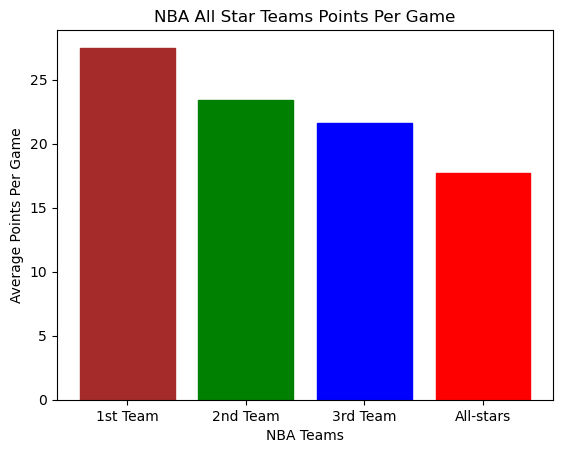

In [46]:
import matplotlib.pyplot as plt 
import numpy as np
# plot each team's points per game average
team_categories = ['1st Team', '2nd Team', '3rd Team', 'All-stars']
average_pts_per_game = [nba_first_team_ppg, nba_sec_team_ppg, nba_third_team_ppg, nba_all_star_team_ppg]
bar = plt.bar(team_categories, average_pts_per_game)
plt.title('NBA All Star Teams Points Per Game')
plt.xlabel('NBA Teams')
plt.ylabel('Average Points Per Game')
pattern = ['red', 'blue', 'green', 'brown']
for chunk in bar:
    chunk.set_color(pattern.pop())
plt.show()

### Question 2  

**QUESTION:** What was the average number of years of experience in the league it takes for players to make their first All NBA Selection (1st, 2nd, or 3rd team)? Please limit your sample to players drafted in 2007 or later who did eventually go on to win at least one All NBA selection. For example:

- Luka Doncic is in the dataset as 2 years. He was drafted in 2018 and won his first All NBA award in 2019 (which was his second season).  
- LeBron James is not in this dataset, as he was drafted prior to 2007.  
- Lu Dort is not in this dataset, as he has not received any All NBA honors.  



### Add last season played column in merge_df1

In [47]:
# make a copy of player_stats df 
player_stats1 = player_stats
# Group by nbapersonid and calculate last season and years of experience
grouped = player_stats1.groupby('nbapersonid').agg({
    'season': 'max',
    'draftyear': 'first'
})

# Calculate years of experience
grouped['Years_of_experience'] = grouped['season'] - grouped['draftyear'] + 1

# Merge the grouped data back to the player_stats1 dataframe
player_stats1 = player_stats1.merge(grouped, left_on='nbapersonid', right_index=True, suffixes=('', '_grouped'))

player_stats1

# merge player_stats1 with awards df 
merge_df1 = pd.merge(awards, player_stats1, on = ['nbapersonid', 'season'],how = 'inner')
# merge_df1['Years_of_experience'] = merge_df1['Years_of_experience'] - 1
merge_df1




,season,nbapersonid,All NBA Defensive First Team,All NBA Defensive Second Team,All NBA First Team,All NBA Second Team,All NBA Third Team,All Rookie First Team,All Rookie Second Team,Bill Russell NBA Finals MVP,...,OWS,DWS,WS,OBPM,DBPM,BPM,VORP,season_grouped,draftyear_grouped,Years_of_experience
0,2007,708.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,6.6,6.2,12.9,4.7,3.5,8.2,6.0,2015,1995,21
1,2007,947.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.9,2.8,11.6,3.4,-0.7,2.7,4.0,2009,1996,14
2,2007,948.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.6,5.9,8.5,0.1,3.3,3.4,3.8,2012,1996,17
3,2007,959.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,9.0,1.4,10.5,5.8,-1.8,3.9,4.2,2013,1996,18
4,2007,977.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,9.5,4.3,13.8,5.2,0.6,5.8,6.3,2015,1996,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4511,2015,1626170.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.2,1.0,0.8,-2.8,-0.3,-3.1,-0.3,2019,2015,5
4512,2015,1626202.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.5,0.5,-0.1,-3.9,-0.8,-4.7,-0.3,2017,2015,3
4513,2015,1626273.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.2,0.1,-0.1,-2.7,-2.2,-5.0,-0.7,2016,2005,12
4514,2018,1628971.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.1,1.6,1.5,-4.4,1.0,-3.3,-0.5,2021,2018,4


### Filter merged_df with players drafted in 2007 or later AND won >= 1 NBA selection 

In [48]:
# filter merged_df into question_2_df
question_2_df = merge_df1[(merge_df1['draftyear'] >= 2007) & ((merge_df1['All NBA First Team'] == 1) | (merge_df1['All NBA Second Team'] == 1) | (merge_df1['All NBA Third Team'] == 1))]
question_2_df

# filter necessary columns for this question
# only have columns: season, nbapersonid, ALL NBA Team selections, last_seasons, draft_year
question_2_cols = ['season', 'nbapersonid', 'All NBA First Team', 'All NBA Second Team', 'All NBA Third Team', 'draftyear', 'last_seasons', 'Years_of_experience']

# Create the new dataframe with selected columns
question_2_df = question_2_df.reindex(columns=question_2_cols)
# view question_2_df
question_2_df
# drop last_seasons column
question_2_df.drop(columns = ['last_seasons'])

,season,nbapersonid,All NBA First Team,All NBA Second Team,All NBA Third Team,draftyear,Years_of_experience
126,2009,201142.0,1.0,0.0,0.0,2007,15
170,2010,201142.0,1.0,0.0,0.0,2007,15
171,2010,201143.0,0.0,0.0,1.0,2007,15
173,2010,201565.0,1.0,0.0,0.0,2008,14
174,2010,201566.0,0.0,1.0,0.0,2008,14
...,...,...,...,...,...,...,...
686,2021,1627783.0,0.0,0.0,1.0,2016,6
688,2021,1628369.0,1.0,0.0,0.0,2017,5
696,2021,1629027.0,0.0,0.0,1.0,2018,4
697,2021,1629029.0,1.0,0.0,0.0,2018,4


### Calculate average years of experience in league for players to make into All NBA Selection

In [49]:
question_2_mean_groups = question_2_df.groupby(['nbapersonid'])['Years_of_experience'].mean()
question_2_answer = round(question_2_mean_groups.mean(),1)
print('The average it takes for a player to make into All NBA Selection is', question_2_answer,'years of experience')

The average it takes for a player to make into All NBA Selection is 10.3 years of experience


## Question: Which season was the best in terms of Points per Game for Kevin Durant

In [50]:
player_stats.head()

,nbapersonid,player,draftyear,draftpick,season,nbateamid,team,games,games_start,mins,...,blk_pct,tov_pct,usg,OWS,DWS,WS,OBPM,DBPM,BPM,VORP
0,2585,Zaza Pachulia,2003,42.0,2007,1610612737,ATL,62,5,944,...,0.010,0.181,0.183,0.2,0.9,1.1,-3.9,-1.3,-5.1,-0.7
1,200780,Solomon Jones,2006,33.0,2007,1610612737,ATL,35,0,145,...,0.026,0.221,0.156,-0.1,0.1,0.0,-6.7,-2.0,-8.8,-0.2
2,2746,Josh Smith,2004,17.0,2007,1610612737,ATL,81,81,2873,...,0.059,0.155,0.250,1.2,4.6,5.8,0.5,2.5,3.0,3.7
3,201151,Acie Law,2007,11.0,2007,1610612737,ATL,56,6,865,...,0.000,0.178,0.165,-0.5,0.4,-0.1,-4.2,-1.0,-5.2,-0.7
4,101136,Salim Stoudamire,2005,31.0,2007,1610612737,ATL,35,0,402,...,0.009,0.094,0.252,0.1,0.1,0.3,-1.0,-2.5,-3.5,-0.1


In [51]:
kevin_durant_df = player_stats[player_stats['player'] == 'Kevin Durant']
kevin_durant_df.head()

,nbapersonid,player,draftyear,draftpick,season,nbateamid,team,games,games_start,mins,...,blk_pct,tov_pct,usg,OWS,DWS,WS,OBPM,DBPM,BPM,VORP
374,201142,Kevin Durant,2007,2.0,2007,1610612760,OKC,80,80,2768,...,0.019,0.129,0.281,0.4,1.9,2.3,0.5,-0.7,-0.1,1.3
875,201142,Kevin Durant,2007,2.0,2008,1610612760,OKC,74,74,2885,...,0.014,0.122,0.283,5.2,2.7,7.9,3.4,-0.1,3.3,3.8
1392,201142,Kevin Durant,2007,2.0,2009,1610612760,OKC,82,82,3239,...,0.019,0.117,0.320,11.1,5.0,16.1,6.3,0.8,7.1,7.5
1922,201142,Kevin Durant,2007,2.0,2010,1610612760,OKC,78,78,3038,...,0.018,0.106,0.306,8.6,3.3,12.0,5.2,-0.3,4.9,5.3
2455,201142,Kevin Durant,2007,2.0,2011,1610612760,OKC,66,66,2546,...,0.022,0.140,0.313,8.5,3.7,12.2,6.2,0.8,7.0,5.8


In [52]:
kevin_durant_ppg_list = []

for year in kevin_durant_df['season']:
    per_year_stats = kevin_durant_df.loc[kevin_durant_df['season'] == year] 
    kevin_durant_ppg = round(per_year_stats['points'] / per_year_stats['games'], 1)
    kevin_durant_ppg_list.append((year, kevin_durant_ppg.iloc[0]))  # Append as tuple
    
    print(year, kevin_durant_ppg.iloc[0], 'points per game')

2007 20.3 points per game
2008 25.3 points per game
2009 30.1 points per game
2010 27.7 points per game
2011 28.0 points per game
2012 28.1 points per game
2013 32.0 points per game
2014 25.4 points per game
2015 28.2 points per game
2016 25.1 points per game
2017 26.4 points per game
2018 26.0 points per game
2020 26.9 points per game
2021 29.9 points per game


)

In [53]:
max_points = -1
max_year = 0
for year, points in kevin_durant_ppg_list:
    if points > max_points:
        max_points = points
        max_year = year

print('The season',max_year, 'is Kevin Durant highest points per game season with', max_points, 'points per game')

The season 2013 is Kevin Durant highest points per game season with 32.0 points per game


### Visualize KD's season and his PPG

In [54]:
kevin_durant_df.head()

,nbapersonid,player,draftyear,draftpick,season,nbateamid,team,games,games_start,mins,...,blk_pct,tov_pct,usg,OWS,DWS,WS,OBPM,DBPM,BPM,VORP
374,201142,Kevin Durant,2007,2.0,2007,1610612760,OKC,80,80,2768,...,0.019,0.129,0.281,0.4,1.9,2.3,0.5,-0.7,-0.1,1.3
875,201142,Kevin Durant,2007,2.0,2008,1610612760,OKC,74,74,2885,...,0.014,0.122,0.283,5.2,2.7,7.9,3.4,-0.1,3.3,3.8
1392,201142,Kevin Durant,2007,2.0,2009,1610612760,OKC,82,82,3239,...,0.019,0.117,0.320,11.1,5.0,16.1,6.3,0.8,7.1,7.5
1922,201142,Kevin Durant,2007,2.0,2010,1610612760,OKC,78,78,3038,...,0.018,0.106,0.306,8.6,3.3,12.0,5.2,-0.3,4.9,5.3
2455,201142,Kevin Durant,2007,2.0,2011,1610612760,OKC,66,66,2546,...,0.022,0.140,0.313,8.5,3.7,12.2,6.2,0.8,7.0,5.8


In [55]:
# create a list contains all of the seasons KD played
KD_season = list(kevin_durant_df['season'])
kevin_durant_ppg_list1 = []
kevin_durant_ppg_list

[(2007, 20.3),
 (2008, 25.3),
 (2009, 30.1),
 (2010, 27.7),
 (2011, 28.0),
 (2012, 28.1),
 (2013, 32.0),
 (2014, 25.4),
 (2015, 28.2),
 (2016, 25.1),
 (2017, 26.4),
 (2018, 26.0),
 (2020, 26.9),
 (2021, 29.9)]

In [57]:
# for loop that appends only the ppg for each season that KD had
for year, points in kevin_durant_ppg_list:
    kevin_durant_ppg_list1.append(points)

kevin_durant_ppg_list_with_only_ppg = kevin_durant_ppg_list1

In [59]:
# check length of KD_season
KD_season

[2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2020,
 2021]

In [62]:
# check len of kevin_durant_ppg_list_with_only_ppg
kevin_durant_ppg_list_with_only_ppg = kevin_durant_ppg_list_with_only_ppg[:14]
kevin_durant_ppg_list_with_only_ppg

[20.3,
 25.3,
 30.1,
 27.7,
 28.0,
 28.1,
 32.0,
 25.4,
 28.2,
 25.1,
 26.4,
 26.0,
 26.9,
 29.9]

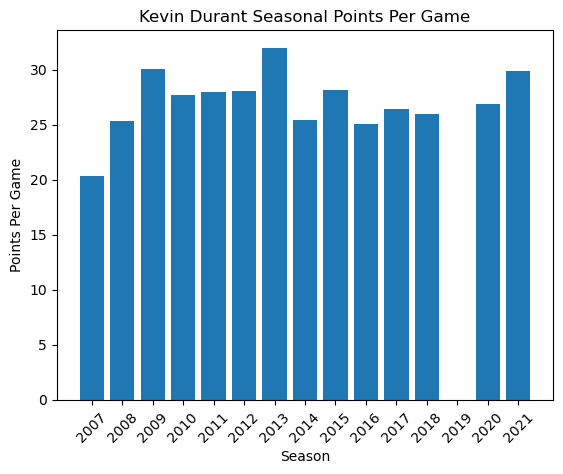

<Figure size 1500x900 with 0 Axes>

In [76]:
# create bar chart showing each season as categories and ppg as counts
plt.bar(KD_season, kevin_durant_ppg_list_with_only_ppg)
plt.title('Kevin Durant Seasonal Points Per Game')
plt.xlabel('Season')
plt.ylabel('Points Per Game')
plt.xticks([2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021])
plt.xticks(rotation = 45)
plt.figure(figsize = (5,3), dpi = 300)
plt.show()